In [1]:
# Import Data Manipulation Library 
import pandas as pd
import numpy as np 
# Import Data visulaization Library 
import seaborn as sns
import matplotlib.pyplot as plt
# Import filter Warnings Library 
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging 
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)

In [2]:
logging.info('Import Dataset For Model Building...')

In [3]:
# Import dataset from URL 
url = 'https://raw.githubusercontent.com/TechAnjum/CementPrediction_model/refs/heads/main/Concrete_Data.csv'
df = pd.read_csv(url)
df.sample(frac = 1)

Cement (component 1)(kg in a m^3 mixture)  \
212                                       230.0   
12                                        427.5   
1013                                      355.9   
171                                       531.3   
573                                       316.1   
...                                         ...   
7                                         380.0   
773                                       382.0   
776                                       339.0   
661                                       141.3   
516                                       202.0   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
212                                                 0.0       
12                                                 47.5       
1013                                                0.0       
171                                                 0.0       
573                                               210.7       
...                                                 ...       
7                                                  95.0       
773                                                 0.0       
776                                                 0.0       
661                                               212.0       
516                                                11.0       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
212                                        118.3   
12                                           0.0   
1013                                       141.6   
171                                          0.0   
573                                          0.0   
...                                          ...   
7                                            0.0   
773                                          0.0   
776                                          0.0   
661                                          0.0   
516                                        141.0   

      Water  (component 4)(kg in a m^3 mixture)  \
212                                       195.5   
12                                        228.0   
1013                                      193.3   
171                                       141.8   
573                                       185.7   
...                                         ...   
7                                         228.0   
773                                       186.0   
776                                       185.0   
661                                       203.5   
516                                       206.0   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
212                                                 4.6     
12                                                  0.0     
1013                                               11.0     
171                                                28.2     
573                                                 0.0     
...                                                 ...     
7                                                   0.0     
773                                                 0.0     
776                                                 0.0     
661                                                 0.0     
516                                                 1.7     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
212                                              1029.4      
12                                                932.0      
1013                                              801.4      
171                                               852.1      
573                                               977.0      
...                                                 ...      
7                                                 932.0      
773                                              1047.0      
776                                              1069.0      
661                                          

In [4]:
# Checking Data Columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# OLS (ordenary Least Square ) Regression Analysis

In [6]:
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 29 May 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:39:26   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Explorartory Data Analysis 

In [10]:
# Checking Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
# Checking Descriptive Stats: EDA 
# Univariate Analysis 
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

Feature        Mean   Median  \
0          Cement (component 1)(kg in a m^3 mixture)  281.167864  272.900   
1  Blast Furnace Slag (component 2)(kg in a m^3 m...   73.895825   22.000   
2         Fly Ash (component 3)(kg in a m^3 mixture)   54.188350    0.000   
3          Water  (component 4)(kg in a m^3 mixture)  181.567282  185.000   
4  Superplasticizer (component 5)(kg in a m^3 mix...    6.204660    6.400   
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...  972.918932  968.000   
6  Fine Aggregate (component 7)(kg in a m^3 mixture)  773.580485  779.500   
7                                          Age (day)   45.662136   28.000   
8   Concrete compressive strength(MPa, megapascals)    35.817961   34.445   

        Q1        Q3      IQR  Standard Deviation  Skewness   Kurtosis  
0  192.375   350.000  157.625          104.506364  0.509481  -0.520652  
1    0.000   142.950  142.950           86.279342  0.800717  -0.508175  
2    0.000   118.300  118.300           63.997004  0.537354  -1.328746  
3  164.900   192.000   27.100           21.354219  0.074628   0.122082  
4    0.000    10.200   10.200            5.973841  0.907203   1.411269  
5  932.000  1029.400   97.400           77.753954 -0.040220  -0.599016  
6  730.950   824.000   93.050           80.175980 -0.253010  -0.102177  
7    7.000    56.000   49.000           63.169912  3.269177  12.168989  
8   23.710    46.135   22.425           16.705742  0.416977  -0.313725

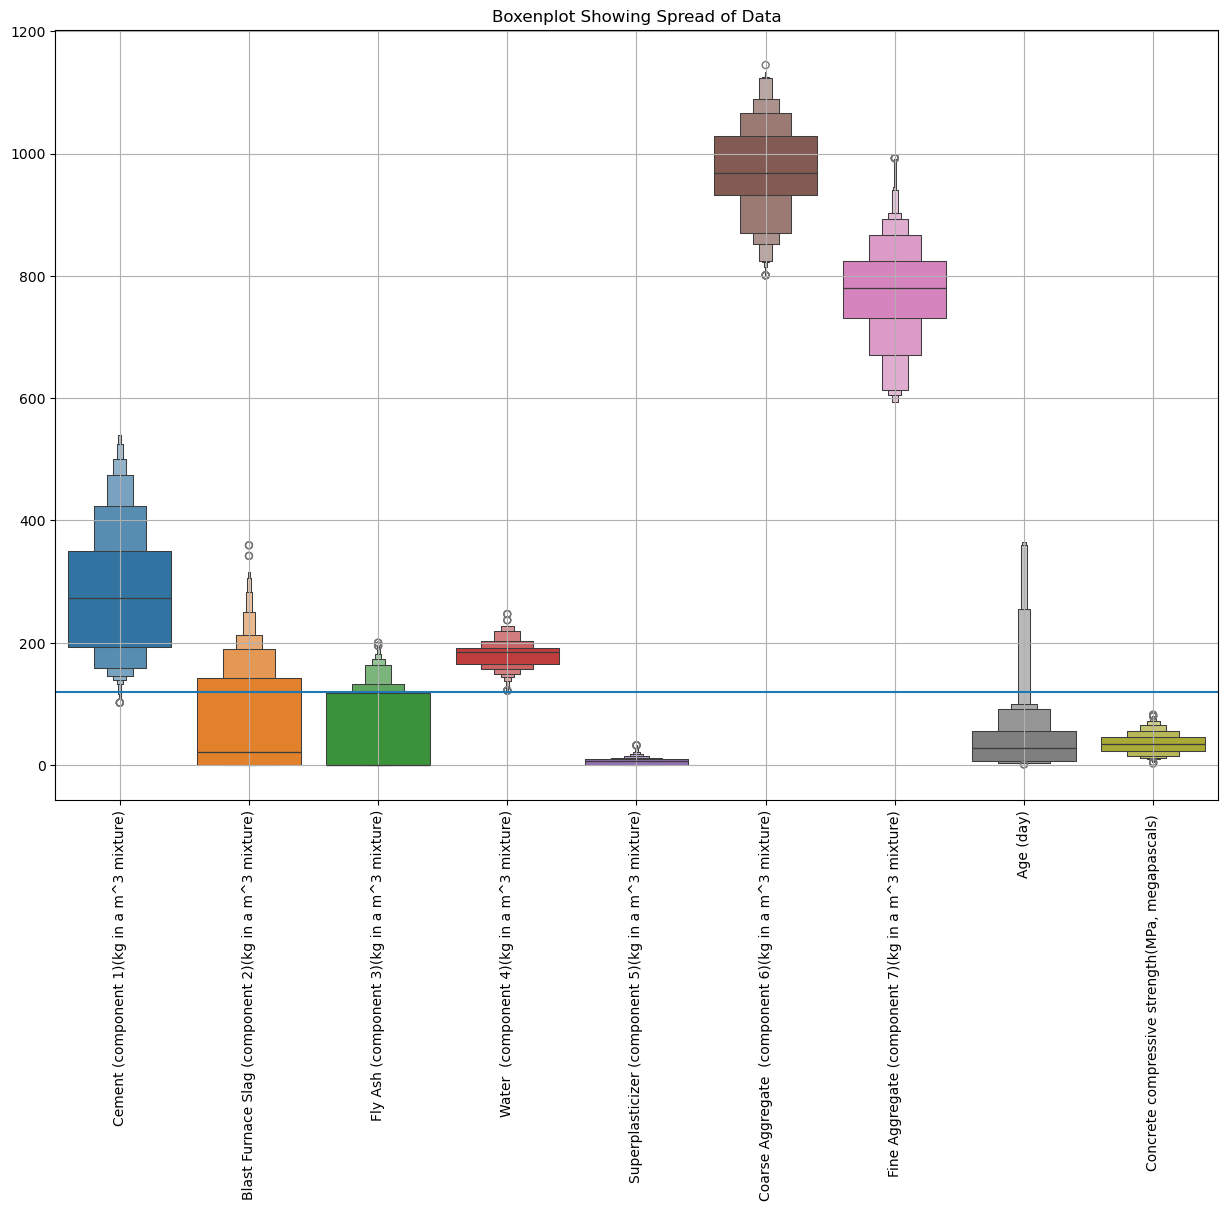

In [20]:
'''
Note:
1. Positive Kurtosis : LeptoKurtic
2. Normal Distribution : MesoKurtic 
3. Negative Distribution : PlatyKurtic
............................................
1. Positive Skewness : mode<median<mean
2. No Skewness : Normally Distributed :mean = median = mode 
3. Negative Skewness : mean<median<mode 
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot Showing Spread of Data')
plt.grid()
plt.show()

<Axes: >

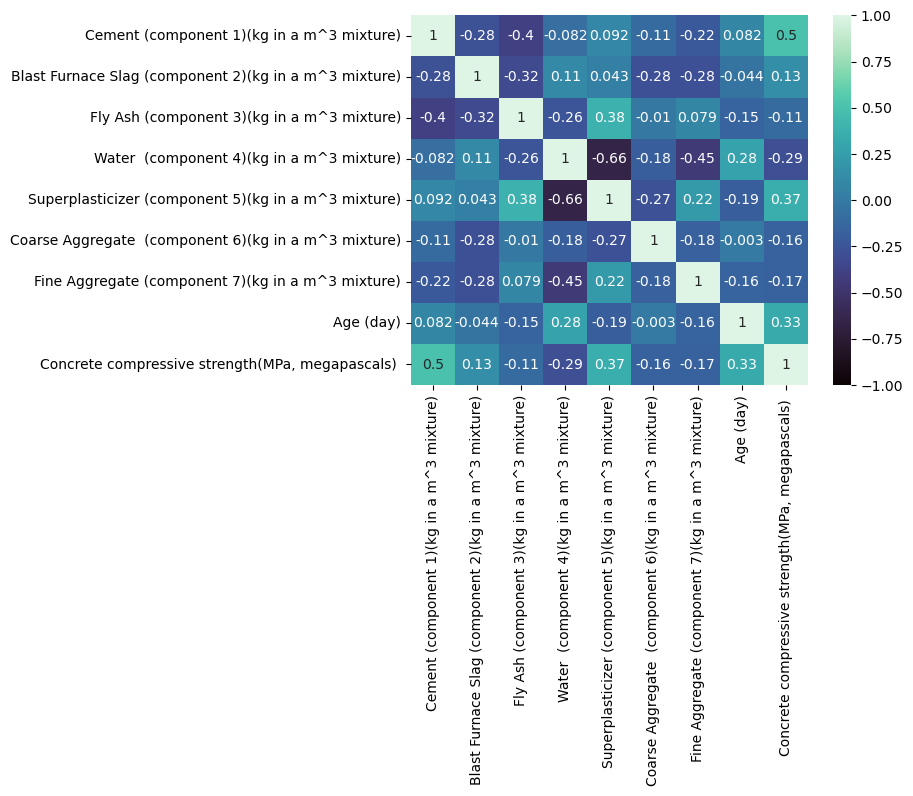

In [48]:
# Heatmap 
sns.heatmap(df.corr(),annot = True , center = 0 , vmax = 1 ,vmin = -1 , cmap ='mako')

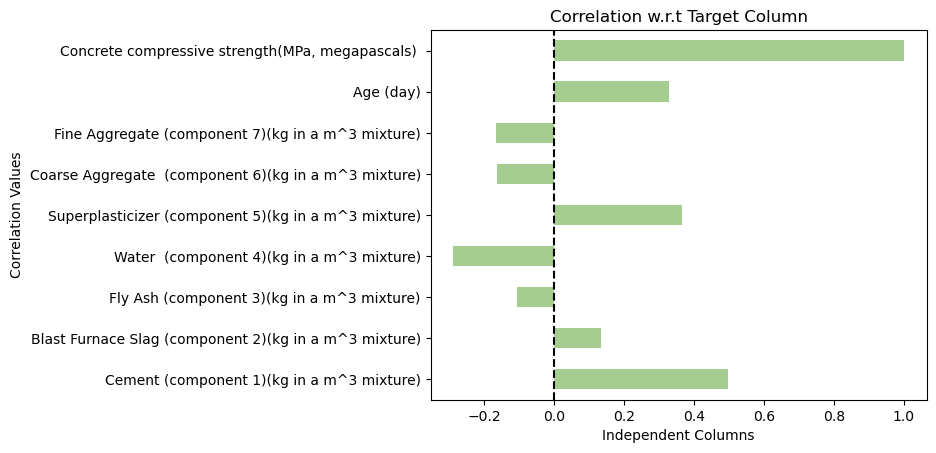

In [58]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind='barh',cmap = 'crest')
plt.axvline(0,linestyle = '--',color='black')
plt.title('Correlation w.r.t Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()